In [1]:
import ROOT
from ROOT import larlite
from ROOT import TFile, TH1D
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
import root_numpy as rn
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import simps,trapz
%matplotlib inline

In [74]:
f = TFile("numode_bnb_470m_r200.root")

flux_pot = 1 #e+20
sample_pot = 2.42 #e+20
cosmic_pot = 1.90 #e+20

numu = f.Get("numu")
numu = TH1D(numu)
numu.Scale(sample_pot/flux_pot)
int_flux = numu.Integral()
mean = numu.GetMean() 

#numu.Scale(cosmic_pot) #/sample_pot)
#cosmic_flux = numu.Integral()

flux_v = rn.hist2array(hist=numu)
energy = np.arange(0.,2,0.05)
#energy = np.linspace(0.,10,200)

int_flux_old = simps(flux_v[:40], energy) #/ flux_pot * sample_pot
#cosmic_flux = int_flux / sample_pot * cosmic_pot
print "OLD BNB SAMPLE: %.3e " % int_flux_old

print("BNB Only Flux: {:.3e}".format(int_flux))
#print("Cosmic BNB Flux: {:.3e}".format(cosmic_flux))
print "Mean energy: ", numu.GetMean()

OLD BNB SAMPLE: 8.497e+09 
BNB Only Flux: 1.737e+11
Mean energy:  0.823394183753


In [40]:
tot_flux = np.cumsum(flux_v)[-1]

print tot_flux / 1e+9
run_sum = 0
for i in xrange(len(flux_v)): 
    if run_sum > tot_flux/2:
        break
    run_sum += flux_v[i]

#print energy[i-1], energy[i]
e = (energy[i-1] + energy[i])/2
print e

173.741579833
0.725


FLUX : 8.67e+09


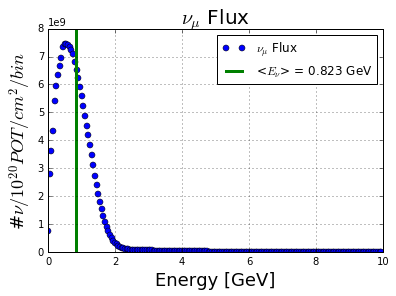

In [63]:
# Check whether or not this is the scaled flux
plt.figure()
plt.plot(energy,flux_v,'bo',label="$\\nu_\mu$ Flux")
plt.grid(True)#,which='both')
plt.xlabel("Energy [GeV]",fontsize=18)
plt.ylabel("#$\\nu / 10^{20} POT / cm^2/bin$",fontsize=18)
plt.title("$\\nu_\mu$ Flux",fontsize=20)
plt.axvline(mean,color='g',lw=3,label = "<$E_\\nu$> = %.3f GeV"%mean)
plt.legend()
plt.savefig("numu_flux.png")
#plt.xlim(0,4)

trap_area = 0
for i in xrange(len(flux_v)-1):
    trap_area += (flux_v[i] + flux_v[i+1]) / 2 * 0.05 

print "FLUX : %.2e" % trap_area 

In [46]:
def getXSection(N_sig,N_bkgd,N_targ,eff,flux):
    
    xsec = float(N_sig - N_bkgd)/(N_targ * eff * flux)
    return xsec

In [141]:
N_sig = 3495
N_bkgd = 0
N_targ = 3.584e+31
eff = 1.
flux = int_flux

xsec = getXSection(N_sig,N_bkgd,N_targ,eff,int_flux)

print("Cross section is {:.2e}".format(xsec))
print("With average energy {:.2f} [MeV]".format(823.4))

Cross section is 5.61e-40
With average energy 823.40 [MeV]
